In [123]:
## Cargar librerías necesarias para cálculos
import pandas as pd
import numpy as np

## Matplotlib y Seaborn para visualizaciones de alta calidad
import matplotlib.pyplot as plt
import seaborn as sns

## Herramientas de Scikit-learn para el modelado
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                             confusion_matrix, ConfusionMatrixDisplay,
                             mean_squared_error, mean_absolute_error, r2_score)

In [124]:
#3 Configuración de estilo para los gráficos
%matplotlib inline
sns.set_style('darkgrid')
plt.style.use('seaborn-v0_8-deep')

In [125]:
# Cargar sin encabezado ya que este no los tiene y toca asignarlos
df = pd.read_csv('/content/cancer.data', header=None)

# Asignar nombres de columnas
df.columns = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'Class']
columnsNums = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'target']

df['target'] = df['Class'] # 4: Maligno, 2: Benigno

print(f"El dataset tiene {df.shape[0]} muestras y {df.shape[1]} columnas.")
df.head()

El dataset tiene 699 muestras y 12 columnas.


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class,target
0,1000025,5,1,1,1,2,1,3,1,1,2,2
1,1002945,5,4,4,5,7,10,3,2,1,2,2
2,1015425,3,1,1,1,2,2,3,1,1,2,2
3,1016277,6,8,8,1,3,4,3,7,1,2,2
4,1017023,4,1,1,3,2,1,3,1,1,2,2


In [126]:
## Eliminamos las columnas Sample code number y Class
df = df.drop(['Sample code number'], axis=1)

## Vemos la información general del dataframe
df[columnsNums].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Clump Thickness              699 non-null    int64
 1   Uniformity of Cell Size      699 non-null    int64
 2   Uniformity of Cell Shape     699 non-null    int64
 3   Marginal Adhesion            699 non-null    int64
 4   Single Epithelial Cell Size  699 non-null    int64
 5   Bland Chromatin              699 non-null    int64
 6   Normal Nucleoli              699 non-null    int64
 7   Mitoses                      699 non-null    int64
 8   target                       699 non-null    int64
dtypes: int64(9)
memory usage: 49.3 KB



Distribución de Clases:
Class
2    458
4    241
Name: count, dtype: int64


/tmp/ipython-input-127-3492965714.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df[columnsNums], palette='viridis')


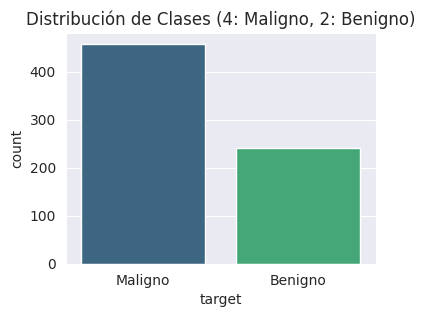

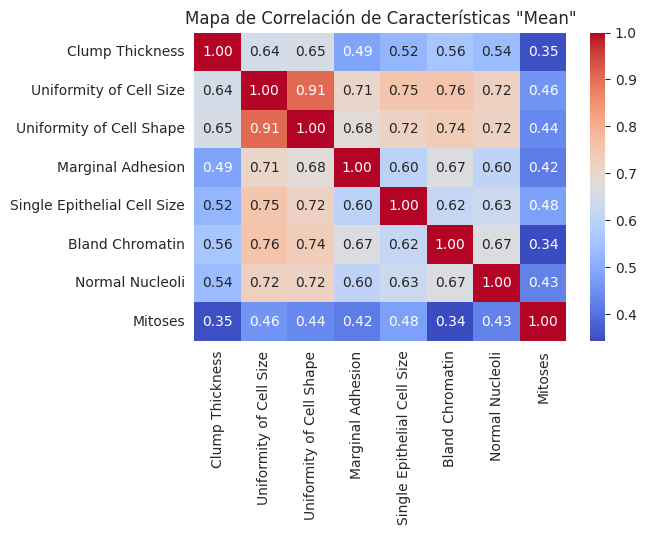

In [127]:
# Revisar el balance de clases.
print("\nDistribución de Clases:")
print(df['Class'].value_counts())

# Visualizar la distribución de clases
plt.figure(figsize=(4, 3))
sns.countplot(x='target', data=df[columnsNums], palette='viridis')
plt.title('Distribución de Clases (4: Maligno, 2: Benigno)')
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.show()

# Veamos la correlación entre algunas características importantes
# Seleccionamos las primeras 8 características y que sean númericas
plt.figure(figsize=(6, 4))
corr_matrix = df[columnsNums].iloc[:, :8].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Correlación de Características "Mean"')
plt.show()

In [128]:
# Separar características (X) y objetivo (y)
X = df[columnsNums].drop('target', axis=1)
y = df['target']

# Training and test datasets
# ---------------------------
# Dividir los datos: 80% para entrenamiento, 20% para prueba.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Estandarizamos los valores para mejor visualización y operación en el modelo. El escalado es necesario.
scaler = StandardScaler()

# Ajustamos el scaler SÓLO con los datos de entrenamiento (para evitar fuga de información)
X_train_scaled = scaler.fit_transform(X_train)
# Y luego aplicamos la misma transformación a los datos de prueba
X_test_scaled = scaler.transform(X_test)


--- Evaluación del Modelo de Clasificación ---
Accuracy: 0.964
Precisión: 0.978
Recall (Sensibilidad): 0.967
F1-Score: 0.973


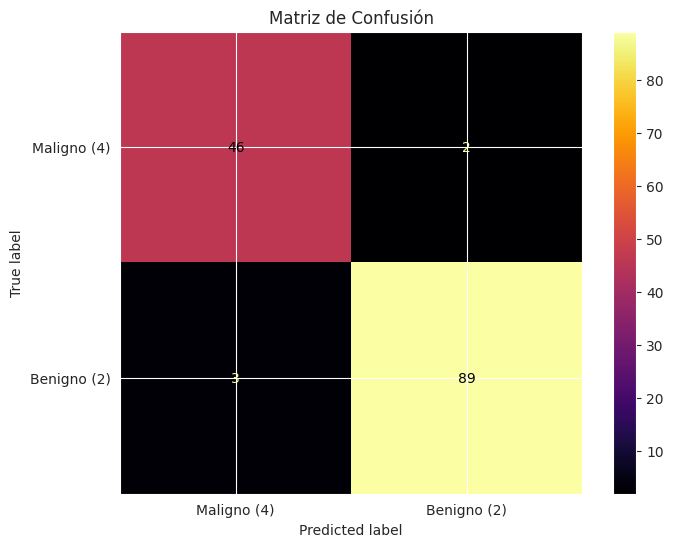

In [129]:
## Entrenar un modelo de Regresión Logística con Regularización
log_reg = LogisticRegression(C=1.0, random_state=42)
log_reg.fit(X_train_scaled, y_train)

## Realizar predicciones en el conjunto de prueba
y_pred = log_reg.predict(X_test_scaled)

## Evaluar el modelo
print("\n--- Evaluación del Modelo de Clasificación ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precisión: {precision_score(y_test, y_pred, pos_label=2):.3f}")
print(f"Recall (Sensibilidad): {recall_score(y_test, y_pred, pos_label=2):.3f}")
print(f"F1-Score: {f1_score(y_test, y_pred, pos_label=2):.3f}")

## Visualizar la Matriz de Confusión
cm = confusion_matrix(y_test, y_pred, labels=[4, 2])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Maligno (4)', 'Benigno (2)'])

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap='inferno')
plt.title("Matriz de Confusión")
plt.show()

In [130]:
# Usaremos 5 folds. El modelo se entrena y evalúa 5 veces.
# Puntuaremos usando 'recall' para la clase maligna, ya que es nuestra métrica clave.
cv_recall_scores = cross_val_score(log_reg, X_train_scaled, y_train, cv=5, scoring=lambda e, x, y: recall_score(y, e.predict(x), pos_label=2))

print("\n--- Validación Cruzada (Clasificación) ---")
print(f"Puntuaciones de Recall en cada fold: {cv_recall_scores}")
print(f"Recall Medio con CV: {cv_recall_scores.mean():.3f} (+/- {cv_recall_scores.std():.3f})")


--- Validación Cruzada (Clasificación) ---
Puntuaciones de Recall en cada fold: [1.         0.94520548 0.97260274 0.95945946 0.94520548]
Recall Medio con CV: 0.964 (+/- 0.020)


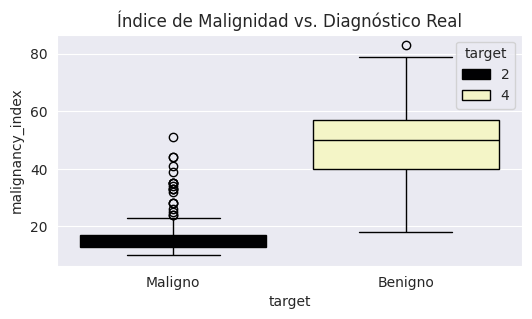

In [131]:
# Creamos un "Índice de Malignidad" como una suma ponderada de características.
features_for_index = columnsNums
df['malignancy_index'] = df[features_for_index].sum(axis=1)
columnsNums = ['Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bland Chromatin', 'Normal Nucleoli', 'Mitoses', 'target', 'malignancy_index']

# Visualicemos cómo se relaciona este nuevo índice con el diagnóstico real.
plt.figure(figsize=(6, 3))
sns.boxplot(x='target', y='malignancy_index', data=df[columnsNums], hue='target', palette='magma')
plt.title('Índice de Malignidad vs. Diagnóstico Real')
plt.xticks([0, 1], ['Maligno', 'Benigno'])
plt.show()

# Preparar los datos para el nuevo problema de regresión
X_reg = df[columnsNums].drop(['target', 'malignancy_index'], axis=1) # Usamos las features originales
y_reg = df['malignancy_index']

# Nuevo split y escalado para el problema de regresión
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)
scaler_r = StandardScaler()

X_train_r_scaled = scaler_r.fit_transform(X_train_r)
X_test_r_scaled = scaler_r.transform(X_test_r)


--- Evaluación del Modelo de Regresión ---
Error Cuadrático Medio (MSE): 0.19
Error Absoluto Medio (MAE): 0.30
Coeficiente de Determinación (R²): 0.999


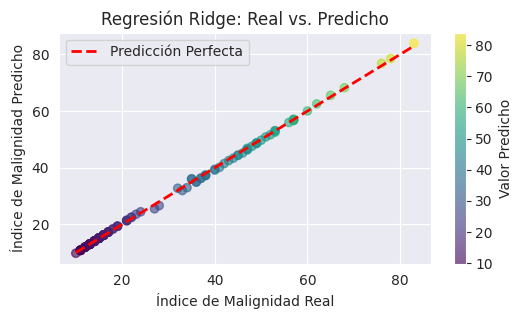

In [132]:
## Entrenar un modelo de Regresión Ridge
ridge_reg = Ridge(alpha=1.0) # alpha controla la fuerza de la regularización
ridge_reg.fit(X_train_r_scaled, y_train_r)

## Realizar predicciones
y_pred_r = ridge_reg.predict(X_test_r_scaled)

## Evaluar el modelo de regresión
mse = mean_squared_error(y_test_r, y_pred_r)
mae = mean_absolute_error(y_test_r, y_pred_r)
r2 = r2_score(y_test_r, y_pred_r)

print("\n--- Evaluación del Modelo de Regresión ---")
print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Error Absoluto Medio (MAE): {mae:.2f}")
print(f"Coeficiente de Determinación (R²): {r2:.3f}")

# 4. Visualizar los resultados
plt.figure(figsize=(6, 3))
plt.scatter(y_test_r, y_pred_r, alpha=0.6, c=y_pred_r, cmap='viridis')
plt.plot([y_test_r.min(), y_test_r.max()], [y_test_r.min(), y_test_r.max()], 'r--', lw=2, label='Predicción Perfecta')
plt.xlabel("Índice de Malignidad Real")
plt.ylabel("Índice de Malignidad Predicho")
plt.title("Regresión Ridge: Real vs. Predicho")
plt.legend()
plt.colorbar(label='Valor Predicho')
plt.show()